In [1]:
from collections import Counter
from pybedtools import BedTool as BT

import warnings
warnings.filterwarnings('ignore')

In [2]:
# some helpful functions
compl = lambda spec: BT(repeat_fps[spec]).sort().complement(g=genome_info_fps[spec])

def countNs(fp):
    c = Counter()

    with open(fp,"r") as fi:
        for line in fi:
            if line.startswith(">"):
                continue
            else:
                c+=Counter(line.rstrip().lower())
                
    return c
            

def get_counts(spec):

    bd = compl(spec)
    bd = bd.sequence(fi=fasta_fps[spec])

    thed = countNs(bd.seqfn)

    Ncount = thed.get('n')

    effectiveCount = thed.get('a') + thed.get('c') + thed.get('g')+thed.get('t')

    repDF = pd.read_csv(repeat_fps[spec], sep='\t',usecols=[0,1,2], header=None)
    repeatCount = (repDF[2]-repDF[1]).values.sum()
    
    return Ncount, effectiveCount, repeatCount

In [3]:
### Sort the chrom info file for bedtools complement
# BT().from_dataframe()

# df = pd.read_csv("/home/ska/panos/DATA/chromInfo/chromInfo_mm10.txt", sep='\t', header=None)
# df['s'] = 0
# df = BT().from_dataframe(df[[0,'s',1]]).sort().to_dataframe()

# df[["chrom","end"]].to_csv("/home/ska/panos/DATA/chromInfo/chromInfo_mm10_sorted.txt", sep='\t',index=False,header=False)

In [4]:
speciesorder = ['amphioxus','zebrafish','medaka','mouse']

In [5]:
genome_info_fps = {"zebrafish" : "/home/ska/panos/DATA/chromInfo/chromInfo_danRer10_sorted.txt",
            "amphioxus" : "/home/ska/panos/DATA/chromInfo/chromInfo_braLan71.txt",
            "medaka" : "/home/ska/panos/DATA/chromInfo/chromInfo_oryLat2_sorted.txt",
            "mouse" : "/home/ska/panos/DATA/chromInfo/chromInfo_mm10_sorted.txt"}

In [6]:
repeat_fps = {"zebrafish" : "/home/ska/panos/DATA/d_repeat_masks/RepMask_danRer10.bed",
            "amphioxus" : "/home/ska/panos/DATA/d_repeat_masks/RepMask_bl71nemr.bed",
            "medaka" : "/home/ska/panos/DATA/d_repeat_masks/RepMask_orylat2.bed",
            "mouse" : "/home/ska/panos/DATA/d_repeat_masks/RepMask_mm10.bed"}

In [7]:
fasta_fps = {
        "zebrafish" : "/scratch/genomes/danRer10.fa",
        "amphioxus" : "/scratch/genomes/Bl71nemr.fasta",
        "medaka" : "/scratch/genomes/oryLat2.fa",
        "mouse" : "/scratch/genomes/mm10.fa"
            }

In [8]:
lot =[ ]
for spec in speciesorder:
    lot.append( (spec, *get_counts(spec)) )
df = pd.DataFrame(lot)
df.columns = ['species','Ncount','effectiveGenomeSize','repeatSize']

WARNING. chromosome (MT) was not found in the FASTA file. Skipping.
WARNING. chromosome (MT) was not found in the FASTA file. Skipping.


In [9]:
df = df[["species","repeatSize","Ncount","effectiveGenomeSize"]]

In [10]:
df

species  repeatSize     Ncount  effectiveGenomeSize
0  amphioxus   152452412   20252512            327521540
1  zebrafish   756790655    1964425            654384100
2     medaka    23221380  168573794            677265199
3      mouse  1201953154   78082998           1456094557

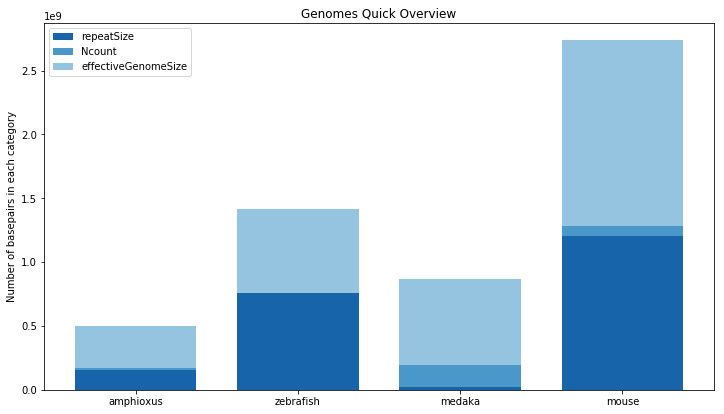

In [18]:
categories = df.columns[1:]
lo_cases = df.species.values
N = len(lo_cases) #how many bars in total are we plotting
palette = sns.color_palette("Blues_r",N)
coL = palette[0]


plt.figure(figsize=(8*1.5,4.5*1.5))


ind = np.arange(N)    # the x locations for the groups
width=0.75

c = np.zeros(N)
cou = 0
lot=[]
for cat,vals in df.iloc[:,1:].iteritems():
    p = plt.bar(ind, vals.values, width, bottom=c , color=palette[cou], alpha=1)
    c+=vals.values
    cou+=1
    lot.append(p[0])


plt.ylabel('Number of basepairs in each category')
plt.title('Genomes Quick Overview')
plt.xticks(ind, lo_cases)

plt.legend(lot, categories,loc='upper left')
# plt.tight_layout()